## Task 2. Chapter 5

[10分钟入门Pandas](https://www.pypandas.cn/document/10min.html)

### 对象创建

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 传入一些值的列表来创建一个Series， pandas会自动常见一个默认的整数索引
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# 通过传递带有日期时间索引和带标签列的NumPy数组来创建DataFrame
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.180691,0.690687,-1.012987,0.136274
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586
2013-01-04,-1.433489,0.446286,0.537918,-0.090837
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930
2013-01-06,-1.164470,2.488841,0.505709,0.323383


In [7]:
# 通过传递可以转化为类似Series的dict对象来创建DataFrame
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes # DataFrame的列具有不同的数据类型

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
# tab键会自动补全所有的列名以及公共属性
df2.abs

<bound method NDFrame.abs of      A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo>

### 查看数据 

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.180691,0.690687,-1.012987,0.136274
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586
2013-01-04,-1.433489,0.446286,0.537918,-0.090837
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.433489,0.446286,0.537918,-0.090837
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930
2013-01-06,-1.164470,2.488841,0.505709,0.323383


In [15]:
# 显示索引、列和底层NumPy数据：
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.18069133,  0.69068684, -1.01298748,  0.1362741 ],
       [-1.35799614, -0.75810863, -1.55373757, -0.82167636],
       [ 0.46110561, -0.61704468, -1.17216145, -1.09158643],
       [-1.433489  ,  0.44628557,  0.53791778, -0.09083733],
       [ 0.13134607, -1.34174967, -1.31853796, -0.35492957],
       [-1.16446968,  2.48884114,  0.50570887,  0.32338306]])

In [18]:
df.describe() # 方法显示数据的快速统计摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.530469,0.151485,-0.668966,-0.316562
std,0.875120,1.377580,0.939441,0.551873
min,-1.433489,-1.341750,-1.553738,-1.091586
25%,-1.309615,-0.722843,-1.281944,-0.704990
50%,-0.516562,-0.085380,-1.092574,-0.222883
75%,0.168355,0.629587,0.126035,0.079496
max,0.461106,2.488841,0.537918,0.323383


In [19]:
df.T # 转置数据

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.180691,-1.357996,0.461106,-1.433489,0.131346,-1.164470
B,0.690687,-0.758109,-0.617045,0.446286,-1.341750,2.488841
C,-1.012987,-1.553738,-1.172161,0.537918,-1.318538,0.505709
D,0.136274,-0.821676,-1.091586,-0.090837,-0.354930,0.323383


In [20]:
df.sort_index(axis=1, ascending=False) # 按轴排序

,D,C,B,A
2013-01-01,0.136274,-1.012987,0.690687,0.180691
2013-01-02,-0.821676,-1.553738,-0.758109,-1.357996
2013-01-03,-1.091586,-1.172161,-0.617045,0.461106
2013-01-04,-0.090837,0.537918,0.446286,-1.433489
2013-01-05,-0.354930,-1.318538,-1.341750,0.131346
2013-01-06,0.323383,0.505709,2.488841,-1.164470


In [21]:
df.sort_values(by='B') # 按值排序

,A,B,C,D
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586
2013-01-04,-1.433489,0.446286,0.537918,-0.090837
2013-01-01,0.180691,0.690687,-1.012987,0.136274
2013-01-06,-1.164470,2.488841,0.505709,0.323383


### 选择

注意：虽然用于选择和赋值的标准Python / Numpy表达式非常直观，并且便于交互工作，但是对于生产环境的代码，我们推荐优化的pandas数据访问方法.at、.iat、.loc和.iloc。
参见索引文档索引、选择数据和多索引/高级索引。

In [22]:
df['A'] # 选择一个列，产生一个“Series”，相当于“df.A”:

2013-01-01    0.180691
2013-01-02   -1.357996
2013-01-03    0.461106
2013-01-04   -1.433489
2013-01-05    0.131346
2013-01-06   -1.164470
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3] # 通过[ ]选择，对行进行切片：

,A,B,C,D
2013-01-01,0.180691,0.690687,-1.012987,0.136274
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586
2013-01-04,-1.433489,0.446286,0.537918,-0.090837


In [25]:
 df.loc[dates[0]] # 通过标签获取一行数据

A    0.180691
B    0.690687
C   -1.012987
D    0.136274
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
# 通过标签在多个轴上选择数据：
df.loc[:,['A','B']]

,A,B
2013-01-01,0.180691,0.690687
2013-01-02,-1.357996,-0.758109
2013-01-03,0.461106,-0.617045
2013-01-04,-1.433489,0.446286
2013-01-05,0.131346,-1.341750
2013-01-06,-1.164470,2.488841


In [27]:
# 通过标签同时在两个轴上切片
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.357996,-0.758109
2013-01-03,0.461106,-0.617045
2013-01-04,-1.433489,0.446286


In [29]:
# 减小返回对象的大小
df.loc['20130102',['A','B']]

A   -1.357996
B   -0.758109
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0],'A'] # 获取标量值

0.1806913294387451

In [31]:
df.at[dates[0],'A'] # 快速访问标量(和上面的方法效果相同)：

0.1806913294387451

In [32]:
df.iloc[3] # 通过传递的整数的位置选择

A   -1.433489
B    0.446286
C    0.537918
D   -0.090837
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
# 通过整数切片，类似于numpy/Python
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.433489,0.446286
2013-01-05,0.131346,-1.341750


In [34]:
# 通过传递整数的列表按位置切片，类似于numpy/Python
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.357996,-1.553738
2013-01-03,0.461106,-1.172161
2013-01-05,0.131346,-1.318538


In [35]:
# 整行切片，整列切片
df.iloc[:,1:3]

,B,C
2013-01-01,0.690687,-1.012987
2013-01-02,-0.758109,-1.553738
2013-01-03,-0.617045,-1.172161
2013-01-04,0.446286,0.537918
2013-01-05,-1.341750,-1.318538
2013-01-06,2.488841,0.505709


In [36]:
# 获取具体值，快速访问标量
df.iloc[1,1]
df.iat[1,1]

-0.7581086283602141

In [37]:
# 布尔索引
df[df.A > 0] #使用单个列的值来选择数据

,A,B,C,D
2013-01-01,0.180691,0.690687,-1.012987,0.136274
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930


In [38]:
# 满足布尔条件的DataFrame中选择值
df[df > 0]

,A,B,C,D
2013-01-01,0.180691,0.690687,NaN,0.136274
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.461106,NaN,NaN,NaN
2013-01-04,NaN,0.446286,0.537918,NaN
2013-01-05,0.131346,NaN,NaN,NaN
2013-01-06,NaN,2.488841,0.505709,0.323383


In [39]:
# 使用 isin() 方法过滤
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.180691,0.690687,-1.012987,0.136274,one
2013-01-02,-1.357996,-0.758109,-1.553738,-0.821676,one
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586,two
2013-01-04,-1.433489,0.446286,0.537918,-0.090837,three
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930,four
2013-01-06,-1.164470,2.488841,0.505709,0.323383,three


In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.461106,-0.617045,-1.172161,-1.091586,two
2013-01-05,0.131346,-1.341750,-1.318538,-0.354930,four


In [41]:
# 赋值,添加新列将自动根据索引对齐数据
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [42]:
# 通过标签赋值
df.at[dates[0],'A'] = 0

In [ ]:
# 位置赋值
df.iat[0,1] = 0

In [43]:
# 使用NumPy数组赋值
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.690687,-1.012987,5
2013-01-02,-1.357996,-0.758109,-1.553738,5
2013-01-03,0.461106,-0.617045,-1.172161,5
2013-01-04,-1.433489,0.446286,0.537918,5
2013-01-05,0.131346,-1.341750,-1.318538,5
2013-01-06,-1.164470,2.488841,0.505709,5


In [44]:
# 带有where条件的赋值操作
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,-0.690687,-1.012987,-5
2013-01-02,-1.357996,-0.758109,-1.553738,-5
2013-01-03,-0.461106,-0.617045,-1.172161,-5
2013-01-04,-1.433489,-0.446286,-0.537918,-5
2013-01-05,-0.131346,-1.341750,-1.318538,-5
2013-01-06,-1.164470,-2.488841,-0.505709,-5


### 缺失值

pandas主要使用值np.nan来表示缺失的数据。 默认情况下，它不包含在计算中。 在 Missing Data section中查看更多。

In [45]:
# 重建索引允许你更改/添加/删除指定轴上的索引。 这个操作会返回一个副本(不会更改原来的对象)。
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.690687,-1.012987,5,1.0
2013-01-02,-1.357996,-0.758109,-1.553738,5,1.0
2013-01-03,0.461106,-0.617045,-1.172161,5,NaN
2013-01-04,-1.433489,0.446286,0.537918,5,NaN


In [46]:
# 删除任何带有缺失值的行
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.690687,-1.012987,5,1.0
2013-01-02,-1.357996,-0.758109,-1.553738,5,1.0


In [47]:
# 填充缺失值
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.690687,-1.012987,5,1.0
2013-01-02,-1.357996,-0.758109,-1.553738,5,1.0
2013-01-03,0.461106,-0.617045,-1.172161,5,5.0
2013-01-04,-1.433489,0.446286,0.537918,5,5.0


In [48]:
# 获取值为nan的掩码
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### 操作

In [49]:
df.mean() # 进行描述性统计

A   -0.560584
B    0.151485
C   -0.668966
D    5.000000
dtype: float64

In [50]:
# 在其它轴(行)上进行同样的操作：
df.mean(1)

2013-01-01    1.169425
2013-01-02    0.332539
2013-01-03    0.917975
2013-01-04    1.137679
2013-01-05    0.617765
2013-01-06    1.707520
Freq: D, dtype: float64

In [52]:
# 使用具有不同维度且需要对齐的对象进行操作。 此外，pandas会自动沿指定维度进行广播
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.538894,-1.617045,-2.172161,4.0
2013-01-04,-4.433489,-2.553714,-2.462082,2.0
2013-01-05,-4.868654,-6.341750,-6.318538,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [54]:
# 应用(Apply)
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.690687,-1.012987,5
2013-01-02,-1.357996,-0.067422,-2.566725,10
2013-01-03,-0.896891,-0.684466,-3.738886,15
2013-01-04,-2.330380,-0.238181,-3.200969,20
2013-01-05,-2.199033,-1.579931,-4.519507,25
2013-01-06,-3.363503,0.908911,-4.013798,30


In [55]:
df.apply(lambda x: x.max() - x.min())

A    1.894595
B    3.830591
C    2.091655
D    0.000000
dtype: float64

In [56]:
# 直方图化
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    3
3    0
4    6
5    3
6    5
7    4
8    5
9    5
dtype: int64

In [57]:
s.value_counts()

5    3
3    3
6    1
4    1
2    1
0    1
dtype: int64

In [58]:
# Series在str属性中配备了一组字符串处理方法，可以轻松地对数组的每个元素进行操作，如下面的代码片段所示。 请注意，str中的模式匹配中默认情况下通常使用正则表达式。
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 合并(Merge)


In [59]:
# pandas提供了各种工具，可以轻松地将Series，DataFrame和Panel对象与各种赋值逻辑组合在一起，用于索引和连接/合并类型操作时的关系代数功能。
# 使用 concat()连接pandas对象：
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.604319,-0.794092,-1.275767,-0.741561
1,-0.678980,-0.524058,-0.326933,-0.067333
2,-1.152413,0.053560,-0.787898,-0.017451
3,-0.092659,-0.116541,-0.506280,0.326976
4,0.879906,-0.534690,-0.445900,-0.236975
5,-1.327596,1.940665,-0.585043,0.375310
6,0.554713,0.624740,-1.623378,-2.691868
7,0.522563,-0.529045,-0.115530,0.485226
8,-0.529420,0.610885,1.031831,-0.557406
9,-0.604981,0.194719,0.197478,0.700837


In [60]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.604319,-0.794092,-1.275767,-0.741561
1,-0.678980,-0.524058,-0.326933,-0.067333
2,-1.152413,0.053560,-0.787898,-0.017451
3,-0.092659,-0.116541,-0.506280,0.326976
4,0.879906,-0.534690,-0.445900,-0.236975
5,-1.327596,1.940665,-0.585043,0.375310
6,0.554713,0.624740,-1.623378,-2.691868
7,0.522563,-0.529045,-0.115530,0.485226
8,-0.529420,0.610885,1.031831,-0.557406
9,-0.604981,0.194719,0.197478,0.700837


In [62]:
# Join， SQL风格的合并
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [63]:
right

,key,rval
0,foo,4
1,foo,5


In [64]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [65]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [66]:
# 追加(Append)，给dataframe追加一行
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df
    

,A,B,C,D
0,-0.881251,-0.437061,-0.008001,0.358027
1,0.970228,1.887349,1.656427,-0.828579
2,1.739462,-0.988955,0.197756,0.382957
3,-0.764659,0.874702,-0.022459,1.593073
4,1.110008,-0.341819,-1.329038,1.662797
5,-1.863630,2.691229,-0.200588,0.277936
6,0.900850,-0.343388,-0.564570,0.252537
7,-0.214578,-2.108485,-0.914896,0.864752


In [68]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.881251,-0.437061,-0.008001,0.358027
1,0.970228,1.887349,1.656427,-0.828579
2,1.739462,-0.988955,0.197756,0.382957
3,-0.764659,0.874702,-0.022459,1.593073
4,1.110008,-0.341819,-1.329038,1.662797
5,-1.863630,2.691229,-0.200588,0.277936
6,0.900850,-0.343388,-0.564570,0.252537
7,-0.214578,-2.108485,-0.914896,0.864752
8,-0.764659,0.874702,-0.022459,1.593073


### 分组(Grouping)

我们所说的“group by“是指涉及下列一项或多项步骤的程序：

- Splitting：根据一些标准将数据分解成组
- Applying：将函数独立地应用于每个组
- Combining：将结果组合成数据结构

In [69]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})

In [70]:
df

,A,B,C,D
0,foo,one,2.535677,0.701586
1,bar,one,0.608235,0.167581
2,foo,two,-1.102383,1.013653
3,bar,three,-0.503499,0.455363
4,foo,two,-1.413601,1.553107
5,bar,two,0.908289,-1.026924
6,foo,one,0.315185,-0.361009
7,foo,three,-0.093388,1.623234


In [71]:
df.groupby('A').sum()

,C,D
A,,
bar,1.013024,-0.403981
foo,0.241489,4.530572


In [72]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.608235  0.167581
    three -0.503499  0.455363
    two    0.908289 -1.026924
foo one    2.850862  0.340577
    three -0.093388  1.623234
    two   -2.515984  2.566761

### 重塑(Reshaping)

In [74]:
# 堆叠(Stack)
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                   'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']])) 
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.929471 -2.258383
      two    -1.159482  0.223619
baz   one    -0.050052 -1.689093
      two     0.155898 -0.009851

In [76]:
# stack()方法压缩DataFrame的列
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.929471
               B   -2.258383
       two     A   -1.159482
               B    0.223619
baz    one     A   -0.050052
               B   -1.689093
       two     A    0.155898
               B   -0.009851
dtype: float64

In [78]:
# stack() 的逆操作是unstack()
stacked.unstack()

A         B
first second                    
bar   one     0.929471 -2.258383
      two    -1.159482  0.223619
baz   one    -0.050052 -1.689093
      two     0.155898 -0.009851

### 数据透视表(PivotTables)

In [79]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})

In [80]:
df

,A,B,C,D,E
0,one,A,foo,0.072888,-0.197398
1,one,B,foo,0.227656,-1.581692
2,two,C,foo,0.637906,0.629725
3,three,A,bar,-1.833714,1.679649
4,one,B,bar,-0.318009,-0.548250
5,one,C,bar,-2.212583,0.458218
6,two,A,foo,0.703293,1.287498
7,three,B,foo,0.026608,0.362250
8,one,C,foo,0.061248,1.364506
9,one,A,bar,-1.589509,0.323098


In [81]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.589509  0.072888
      B -0.318009  0.227656
      C -2.212583  0.061248
three A -1.833714       NaN
      B       NaN  0.026608
      C -0.068511       NaN
two   A       NaN  0.703293
      B  0.013678       NaN
      C       NaN  0.637906

### 时间序列(TimeSeries)

pandas具有简单，强大且高效的功能，用于在频率转换期间执行重采样操作(例如，将第二数据转换为5分钟数据)。 这在财务应用程序中非常常见，但不仅限于此

In [82]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24513
Freq: 5T, dtype: int64

In [83]:
# 时区代表
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.222495
2012-03-07    0.234854
2012-03-08   -0.550227
2012-03-09   -0.683154
2012-03-10   -1.763098
Freq: D, dtype: float64

In [85]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.222495
2012-03-07 00:00:00+00:00    0.234854
2012-03-08 00:00:00+00:00   -0.550227
2012-03-09 00:00:00+00:00   -0.683154
2012-03-10 00:00:00+00:00   -1.763098
Freq: D, dtype: float64

In [86]:
ts_utc.tz_convert('US/Eastern') # 转换为另一个时区

2012-03-05 19:00:00-05:00   -0.222495
2012-03-06 19:00:00-05:00    0.234854
2012-03-07 19:00:00-05:00   -0.550227
2012-03-08 19:00:00-05:00   -0.683154
2012-03-09 19:00:00-05:00   -1.763098
Freq: D, dtype: float64

### 分类(Categoricals)

pandas可以在DataFrame中包含分类数据

In [88]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [90]:
# 将类别重命名为更有意义的名称(通过调用Series.cat.categories来替换！)。
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]    
    

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [91]:
# 排序是按categories中的顺序排序，而不是词汇顺序
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [92]:
# 按分好类的列分组(groupby)可以显示空categories
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 绘图

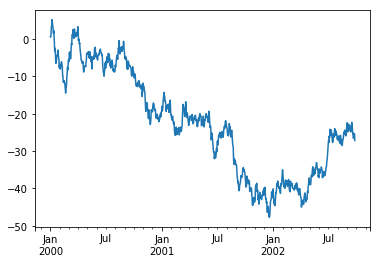

In [93]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [94]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
   
df = df.cumsum()

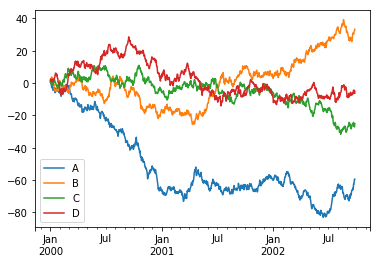

In [95]:
plt.figure(); df.plot(); plt.legend(loc='best')

### 数据输入/输出

In [ ]:
df.to_csv # 写入CSV文件
pd.read_csv # 从CSV文件读数据
# 问题，pandas 数据是全部读入的，那如果文件比较大，内存消耗大怎么处理？